# Supervised Classification: Decision Trees, SVM, and Naive Bayes Assignment

1. What is Information Gain, and how is it used in Decision Trees?
- Information Gain (IG) is a key concept used in decision trees, particularly in algorithms like ID3 (Iterative Dichotomiser 3) and C4.5, for making decisions about how to split data at each node in the tree.

- What is Information Gain?
  * Information Gain is a measure of the effectiveness of an attribute (or feature) in classifying a dataset. It quantifies how much information is gained by knowing the value of an attribute when trying to predict the target variable.

  * In simpler terms, it's the reduction in uncertainty or entropy that results from splitting the data based on a particular feature. The more uncertainty you can eliminate, the higher the information gain.

- Entropy (Related Concept)
  * Before diving into Information Gain, it's useful to understand entropy. Entropy is a measure of disorder or impurity in a dataset. If all the examples belong to a single class, the entropy is 0 (perfectly pure). If the dataset is evenly split across all classes, the entropy is maximum (perfectly impure).

  * Mathematically, entropy is defined as:
    * Entropy(S)=−i=1∑k​pi​log2​(pi​)  
     * S is the dataset,
     * 𝑝iis the proportion of elements in class i,
     * k is the number of classes.

- How is Information Gain Calculated?
- Calculate the Entropy of the Entire Dataset (Before the Split):
  * This is the entropy of the whole dataset with respect to the target class.

- Split the Dataset:
  * For each possible attribute (feature), split the data into subsets based on the attribute's values (this could be a categorical value like "yes" or "no", or a numeric value split at a threshold).  

- Calculate the Entropy of Each Subset:
  * After splitting, calculate the entropy of each subset of data.

- Calculate the Weighted Average Entropy of the Subsets:
  * This is the weighted average of the entropy for each subset, where the weights are the proportions of examples in each subset.   

- Calculate the Information Gain:
  * Information Gain is then the difference between the original entropy and the weighted average entropy of the subsets:  
  * Information Gain(S,A)=Entropy(S)−v∈Values(A)∑​∣S∣∣Sv​∣​Entropy(Sv​)
  * S is the dataset,
  * A is the attribute,
  * Values(A) are the distinct values that the attribute A can take,
  * 𝑆𝑣 is the subset of S where attribute A has value v,
  * ∣𝑆𝑣∣/∣S∣ is the proportion of examples in Sv.

2.  What is the difference between Gini Impurity and Entropy?
- Gini Impurity and Entropy are two different criteria used to measure the "impurity" or "uncertainty" in a dataset, and they are commonly used in decision tree algorithms to decide how to split the data at each node. Both aim to achieve the same goal—optimizing how well the tree classifies the data—but they do so in slightly different ways.

- Mathematical Definition
- Entropy (as discussed earlier) is a measure of disorder or impurity in a dataset, derived from information theory. The formula for entropy of a dataset S is:
 * Entropy(S)=−i=1∑k​pi​log2​(pi​)
 * pi is the proportion of elements in class i,
 * k is the number of classes.
 * Gini Impurity is a simpler measure of impurity. It is calculated using the formula:
 * Gini(S)=1−i=1∑k​pi2​
 * pi is the proportion of elements in class i,
 * k is the number of classes.

- Interpretation and Range
* Entropy measures the "amount of surprise" in the dataset. Higher entropy indicates more uncertainty, meaning the classes are mixed, and lower entropy indicates less uncertainty, meaning the classes are more homogeneous. The value of entropy ranges from:
* Entropy=0 (perfectly pure set, all data points belong to a single class),
* Entropy is maximized when the classes are perfectly balanced (i.e.,pi=1/2 for two classes), with the maximum entropy at log2(k) (for k classes).
* Gini Impurity also measures the level of impurity in the dataset, but it is based on the concept of “impurity” rather than uncertainty. The value of Gini ranges between:
* Gini=0 (perfectly pure, all elements belong to the same class),
* Gini=1−k1 (maximum impurity, when the dataset is evenly split across all classes).In both cases, lower values are better since they correspond to more "pure" splits.

- Behavior of the Measures
* Entropy tends to penalize uneven distributions more heavily than Gini. This means it is more sensitive to cases where the classes are not perfectly balanced, as it has a logarithmic function.
* Gini Impurity is less sensitive to how close the probabilities of the classes are to each other. It focuses on the "most likely" class, and its squared term means it tends to favor splits that isolate the most frequent class more aggressively.

- Computational Efficiency
* Gini Impurity is computationally faster to calculate because it only involves squaring the class proportions, which is simpler than the logarithmic calculation required for entropy.
* Entropy is slightly more computationally expensive because it requires calculating logarithms, but this difference is usually not very noticeable unless you’re working with very large datasets.

- Preference in Decision Trees
* CART (Classification and Regression Trees), the most popular decision tree algorithm, uses Gini Impurity as the splitting criterion by default. It tends to work well in practice and often leads to faster computations.
* ID3, C4.5, and C5.0 (other decision tree algorithms) use Entropy (or a related criterion called "Information Gain") to choose the best attribute for splitting the dataset.

3. What is Pre-Pruning in Decision Trees?
- Pre-pruning in decision trees (also known as early stopping) refers to the technique of stopping the growth of the tree before it becomes fully grown. In other words, it involves halting the splitting process at an early stage, even if there’s still potential to create further splits in the data. The goal of pre-pruning is to avoid overfitting by limiting the complexity of the decision tree.

- Why Pre-Pruning is Used?
* The main reason for using pre-pruning is to prevent overfitting. Decision trees have a tendency to grow very deep if left unchecked, which means they might capture noise or peculiarities in the training data rather than just the underlying patterns. This makes them too complex and less generalizable to new, unseen data.

* Pre-pruning aims to simplify the tree by controlling its growth through various stopping criteria. By limiting the tree’s size, it becomes less likely to overfit and more likely to perform better on unseen test data.

- How Pre-Pruning Works
* Pre-pruning involves setting constraints on the tree-building process to prevent it from creating splits that may lead to overfitting. Here are common techniques used for pre-pruning:

- Maximum Depth of the Tree
* You can limit the maximum depth the tree can grow to. A shallower tree is less likely to overfit.
* For example, if you set a maximum depth of 5, the tree will not grow beyond 5 levels, even if further splits might reduce impurity.

- Minimum Samples per Leaf
* You can require that each leaf node must contain at least a minimum number of training samples.
* For example, if you set a minimum of 10 samples per leaf, the tree will stop splitting any node that would result in a leaf node with fewer than 10 samples.

- Minimum Samples per Split
* This specifies the minimum number of samples that must exist in a node for a split to occur.
* For example, if you set a minimum of 20 samples per split, any node with fewer than 20 samples will not be split further, even if doing so could reduce impurity.

- Maximum Number of Leaf Nodes
* You can set an upper bound on the number of leaf nodes in the tree.
* For example, if you set a maximum of 100 leaf nodes, the tree will stop splitting when it reaches this limit.

- Maximum Features for Splitting
* You can limit the number of features considered for each split at a node.
* For example, in random forests, each tree might only consider a random subset of features for splitting, which also acts as a form of pre-pruning.

- Minimum Impurity Decrease
* A node will only be split if the decrease in impurity (Gini Impurity or Entropy) is greater than a certain threshold.
* For example, if you set a minimum impurity decrease of 0.01, the algorithm will only split a node if it results in an impurity decrease greater than 0.01.

- Benefits of Pre-Pruning
* Reduces Overfitting: By limiting the depth or size of the tree, you ensure that the model doesn’t memorize the training data, making it more likely to generalize well to new, unseen data.

* Simpler Model: Smaller trees are easier to interpret and understand. Pre-pruned trees are often more interpretable since they don't grow too complex.

* Faster Computation: A smaller tree leads to faster predictions and more efficient training, which can be critical for large datasets.

* Avoids Excessive Complexity: Pre-pruning helps keep the tree from becoming unnecessarily complex, making the model easier to maintain and less prone to errors.

- Disadvantages of Pre-Pruning
* Underfitting: If the tree is pruned too early, it might not capture the important patterns in the data, leading to underfitting. This means the model would be too simple and have poor predictive performance.

* Hard to Choose the Right Parameters: Setting appropriate values for the pre-pruning parameters (like maximum depth or minimum samples per split) can be tricky and often requires experimentation or cross-validation.

* Bias in the Model: Pre-pruning adds bias to the model by limiting the complexity, which can sometimes prevent the tree from learning important distinctions in the data.

4. Write a Python program to train a Decision Tree Classifier using Gini
Impurity as the criterion and print the feature importances (practical).
- Here is a Python program that trains a Decision Tree Classifier using Gini Impurity as the criterion and prints the feature importances. The program uses scikit-learn, a popular machine learning library, to accomplish this. I'll use a dataset from sklearn to demonstrate the code (e.g., the Iris dataset).

Accuracy: 100.00%

Feature Importances:
sepal length (cm): 0.0000
sepal width (cm): 0.0191
petal length (cm): 0.8933
petal width (cm): 0.0876


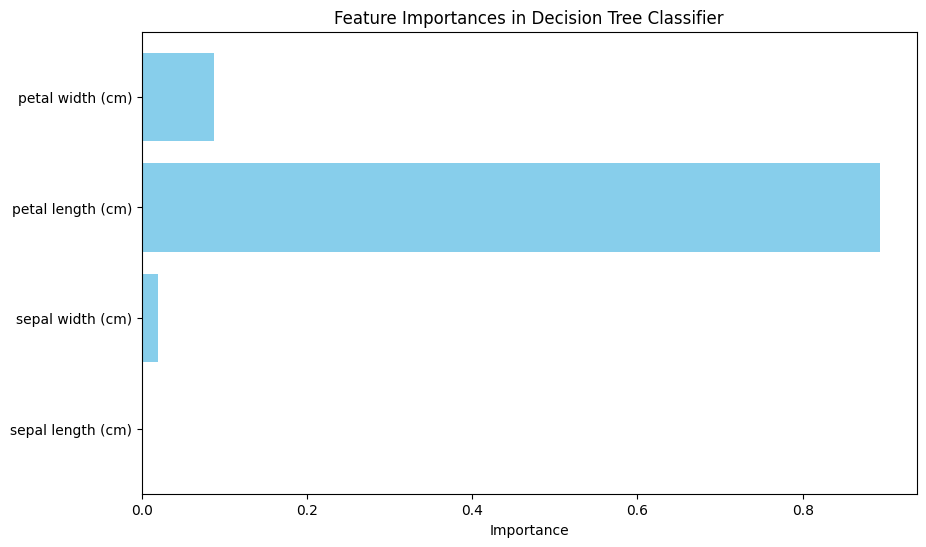

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Load the Iris dataset (you can replace this with your own dataset)
iris = load_iris()
X = iris.data  # Feature data (attributes)
y = iris.target  # Target data (labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier using Gini Impurity (default criterion)
clf = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Get feature importances
feature_importances = clf.feature_importances_

# Print the feature importances
print("\nFeature Importances:")
for feature, importance in zip(iris.feature_names, feature_importances):
    print(f'{feature}: {importance:.4f}')

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(iris.feature_names, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances in Decision Tree Classifier')
plt.show()


5.  What is a Support Vector Machine (SVM)?
- A Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used primarily for classification tasks, but it can also be used for regression. It works by finding the best boundary (or hyperplane) that separates data points of different classes in a feature space. The key concept behind SVM is to maximize the margin between different classes while minimizing classification errors.

- Key Concepts in SVM
- Hyperplane:
* A hyperplane is a decision boundary that separates different classes in the feature space. In two dimensions, this is simply a line, but in higher dimensions, it's a hyperplane.

* The objective of SVM is to find the optimal hyperplane that best divides the data points of one class from the data points of another class.

- Support Vectors:
* The support vectors are the data points that are closest to the decision boundary (hyperplane).

* These points are critical in defining the optimal hyperplane. The position of the support vectors determines the margin, which is the distance between the hyperplane and the support vectors.

* The SVM algorithm tries to find the hyperplane that maximizes the margin between the support vectors of different classes.

- Margin:
* The margin is the distance between the closest data points (support vectors) and the hyperplane.

* SVM aims to maximize this margin, as a larger margin implies better generalization to new data. Intuitively, a larger margin reduces the risk of overfitting.

- Linear and Non-Linear SVM:
* Linear SVM: When the data is linearly separable (i.e., the data can be divided into two classes using a straight line or hyperplane), a linear SVM can be used to separate the classes.

* Non-Linear SVM: When the data is not linearly separable, SVM can still be used by transforming the data into a higher-dimensional space using a technique called the kernel trick. This makes the data linearly separable in the new space, allowing for a non-linear decision boundary in the original feature space.


Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



/tmp/ipython-input-3216690759.py:47: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test data', edgecolors='k', s=100)


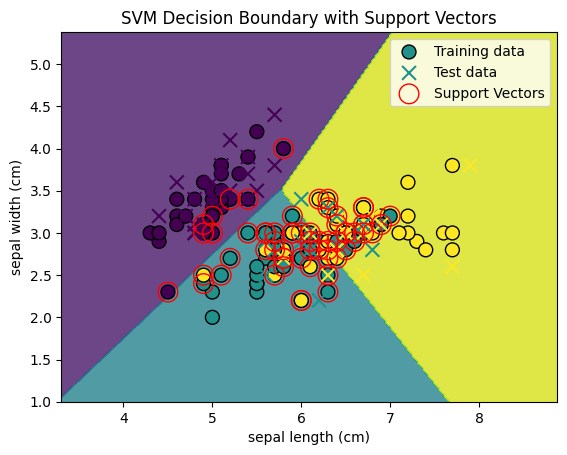

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for 2D visualization (sepal length and sepal width)
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier with a linear kernel
clf = SVC(kernel='linear', random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the decision boundary and the support vectors

# Create a mesh grid for plotting decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Get the predictions on the grid points
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Training data', edgecolors='k', s=100)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test data', edgecolors='k', s=100)

# Plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='r', label='Support Vectors')

# Label the plot
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('SVM Decision Boundary with Support Vectors')
plt.legend()

# Show the plot
plt.show()


6. What is the Kernel Trick in SVM?
- The Kernel Trick is a mathematical technique used in Support Vector Machines (SVMs) to handle non-linearly separable data. It enables SVMs to create decision boundaries that are non-linear in the original feature space by implicitly mapping the data into a higher-dimensional space, where a linear separator (hyperplane) can be found.

- Why the Kernel Trick is Necessary:
  * In many real-world classification tasks, the data is not linearly separable in the original input space (i.e., it's impossible to draw a straight line or hyperplane that perfectly separates the classes). However, by using the kernel trick, SVM can transform this non-linear data into a higher-dimensional space where it is linearly separable.

- Key Concept:
   * The idea is to apply a non-linear transformation to the data, mapping it from the original input space to a higher-dimensional feature space. In this higher-dimensional space, a linear hyperplane can be used to separate the data.  

   * The kernel trick does this implicitly, without the need to compute the transformation explicitly. Instead of directly computing the new higher-dimensional coordinates, SVMs use kernel functions that compute the inner product between the transformed data points in the higher-dimensional space.

- How Does the Kernel Trick Work?
  * Non-linear Data: Suppose you have data that cannot be separated by a linear hyperplane in its current feature space (for example, points from two classes form concentric circles).

  * Transformation to Higher Dimensions: The kernel trick transforms the data into a higher-dimensional space (a feature space), where the data points may become linearly separable. However, instead of explicitly performing this transformation (which could be computationally expensive), SVM uses a kernel function to calculate the inner product in this higher-dimensional space.

  * Inner Product Calculation: The kernel function computes the dot product of two vectors in the transformed feature space without actually performing the transformation. This saves a significant amount of computation time.

  * Finding the Hyperplane: In the higher-dimensional space, SVM looks for the optimal hyperplane that maximizes the margin between the classes, just as it would with linear SVM.

- Kernel Functions
  * The kernel function computes the similarity between two data points, allowing SVM to find non-linear decision boundaries. Some commonly used kernels include:

- Linear Kernel:
  * This is simply the standard dot product of the input vectors.
  * It is used when the data is already linearly separable.     
  * Formula:
    * K(x,x′)=xTx′
  * This is equivalent to no transformation — it doesn't change the feature space.

- Polynomial Kernel:
  * This kernel maps data into a higher-dimensional polynomial space, which allows for non-linear decision boundaries.
  * Formula:    
    * K(x,x′)=(xTx′+c)d
  * d is the degree of the polynomial,
  * c is a constant (typically set to 0 or 1).
  * A polynomial kernel allows for curved decision boundaries and can represent interactions between features.  

- Radial Basis Function (RBF) Kernel (Gaussian Kernel):
  * The RBF kernel is the most commonly used kernel and is particularly powerful when the data is highly non-linear.
  * It transforms the data into an infinite-dimensional feature space and allows for very flexible decision boundaries.  
  * Formula:
    * K(x,x′)=exp(−γ∥x−x′∥2)
  * α and c are constants.
  * It's similar to the activation function in a neural network, but it's less commonly used than the RBF kernel.  


Accuracy: 0.80


/tmp/ipython-input-901299209.py:49: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', edgecolors='k', s=100, label='Test Data', cmap=plt.cm.RdYlBu)


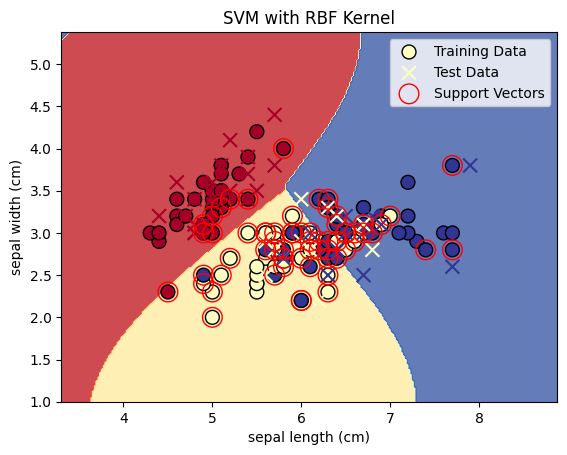

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only two features for 2D visualization (sepal length and sepal width)
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier with an RBF kernel
clf = SVC(kernel='rbf', gamma=0.5, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Plotting decision boundaries and support vectors

# Create a mesh grid for plotting decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Get the predictions on the grid points
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Plot training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolors='k', s=100, label='Training Data', cmap=plt.cm.RdYlBu)

# Plot test points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', edgecolors='k', s=100, label='Test Data', cmap=plt.cm.RdYlBu)

# Highlight support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='red', label='Support Vectors')

# Label the plot
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('SVM with RBF Kernel')

# Show the legend
plt.legend()

# Show the plot
plt.show()


7. Write a Python program to train two SVM classifiers with Linear and RBF
kernels on the Wine dataset, then compare their accuracies.

Accuracy of SVM with Linear Kernel: 0.98
Accuracy of SVM with RBF Kernel: 0.76
The Linear SVM performed better.


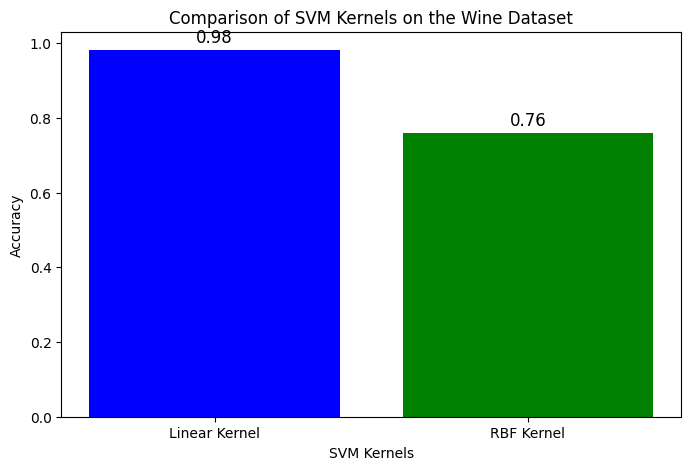

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train SVM classifier with a Linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Create and train SVM classifier with an RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)

# Make predictions with both classifiers
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate the model performance
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Print the accuracy of both classifiers
print(f"Accuracy of SVM with Linear Kernel: {accuracy_linear:.2f}")
print(f"Accuracy of SVM with RBF Kernel: {accuracy_rbf:.2f}")

# Compare the performance and print the result
if accuracy_linear > accuracy_rbf:
    print("The Linear SVM performed better.")
elif accuracy_rbf > accuracy_linear:
    print("The RBF SVM performed better.")
else:
    print("Both SVMs performed equally well.")

# Plotting the comparison of the accuracies
kernels = ['Linear Kernel', 'RBF Kernel']
accuracies = [accuracy_linear, accuracy_rbf]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(kernels, accuracies, color=['blue', 'green'])

# Add labels and title
plt.xlabel('SVM Kernels')
plt.ylabel('Accuracy')
plt.title('Comparison of SVM Kernels on the Wine Dataset')

# Display the accuracy on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=12)

# Show the plot
plt.show()


8. What is the Naïve Bayes classifier, and why is it called "Naïve"?
- The Naïve Bayes classifier is a family of probabilistic classifiers based on Bayes' Theorem, which uses probabilities to predict the class of a given instance (data point) based on its features. It is commonly used for classification tasks and is particularly well-suited for problems involving large datasets, such as text classification (e.g., spam detection) and sentiment analysis.

- Naïve Bayes is a supervised learning algorithm, meaning it requires labeled data for training. It works by calculating the posterior probability for each class and choosing the class with the highest posterior probability.

- Bayes' Theorem:
- Bayes' Theorem is the foundation of the Naïve Bayes classifier. It describes the probability of a class C given the features X1​,X2​,...,Xn using prior knowledge about the class and the features. Mathematically, it is represented as:
  * P(Cx1,X2,...,Xn)=P(X1,X2,...,Xn)P(C)⋅P(X1,X2,...,Xn)
  * P(C∣X1​,X2​,...,Xn​): The posterior probability of class C given features X1​,X2​,...,X
  * P(C): The prior probability of class C (how likely a class is before seeing any features).
  * P(X1​,X2​,...,Xn​∣C):The likelihood of the features given the class C (the probability of observing the features given the class).
  * P(X1,X2,...,Xn):The evidence or the total probability of the features.
	​


Accuracy of Naïve Bayes classifier: 0.98


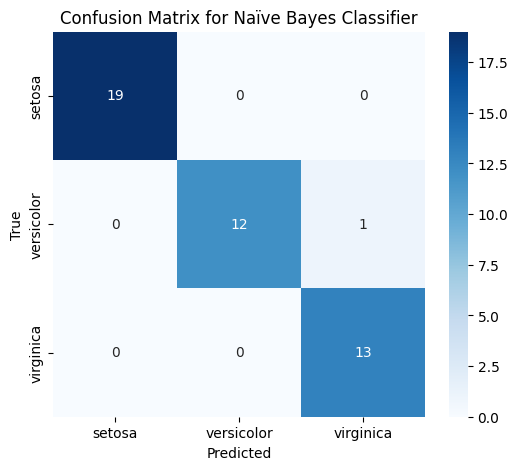

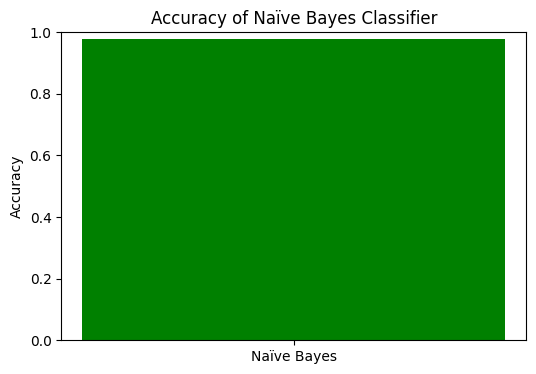

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a Gaussian Naïve Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Naïve Bayes classifier: {accuracy:.2f}")

# Plotting the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for Naïve Bayes Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotting the Accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Naïve Bayes'], [accuracy], color='green')
plt.ylabel('Accuracy')
plt.title('Accuracy of Naïve Bayes Classifier')
plt.ylim(0, 1)
plt.show()


9. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve
Bayes, and Bernoulli Naïve Bayes
- The Naïve Bayes classifier is a probabilistic model that is based on Bayes' Theorem. There are different variations of Naïve Bayes classifiers, each designed to work with different types of data. These variations include Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.

- Gaussian Naïve Bayes (GaussianNB)
  * Assumption:
     * Gaussian Naïve Bayes assumes that the features (input variables) are normally distributed (Gaussian distribution) for each class.
  * Use Case:
     * Continuous data that can be modeled by a Gaussian distribution, where the values of the features are real-valued numbers.

  * How It Works:
      * For each feature, it calculates the mean and variance of the feature for each class during training.
      * During classification, it uses the probability density function of the Gaussian distribution to calculate the likelihood of a feature given a class.      

      * Formula:
        * For a feature Xi with value xi, the likelihood 𝑃(𝑋𝑖∣𝐶) is given by the Gaussian distribution:
        * P(Xi​∣C)=2πσ21​exp(−2σ2(xi​−μ)2​)
        * μ is the mean of the feature for class C,
        * σ is the standard deviation of the feature for class C,
        * xi is the observed value of the feature.

- Multinomial Naïve Bayes (MultinomialNB)
  * Assumption:
     * Multinomial Naïve Bayes assumes that the features are discrete counts or frequencies of events (such as word counts in text classification problems).        

  * Use Case:
     * Text classification tasks where features are the counts of occurrences of words or other categorical variables. Commonly used in document classification and spam detection

  * How It Works:
     * The model calculates the probability of each word (feature) given a class, assuming that each word is drawn from a multinomial distribution.
     * For a given document, the likelihood of a class is the product of the probabilities of each word in the document.      

     * Formula:
       * For a feature Xi(e.g., word count or frequency), the likelihood P(Xi∣C) is calculated using the Multinomial distribution:
       * P(X1​,X2​,...,Xn​∣C)=(X1​!X2​!...Xn​!)(N!)​i=1∏n​P(Xi​∣C)Xi​
       * Xi is the count of word i,
       * N is the total number of words,
       * P(Xi∣C) is the probability of observing word i given class C.

- Bernoulli Naïve Bayes (BernoulliNB)
  * Assumption:
     * Bernoulli Naïve Bayes assumes that the features are binary (i.e., they are either present or absent). The features are typically modeled as Bernoulli random variables, which can take two values: 0 or 1.

  * Use Case:       
     * Binary features or Boolean data, where each feature is represented by the presence or absence of a characteristic. This model is suitable for datasets with binary features.

  * How It Works:
     * For each feature, it calculates the probability of it being present (1) or absent (0) for each class.
     * It uses the Bernoulli distribution to calculate the likelihood for each feature.   

  * Formula:
    * For a binary feature Xi, the likelihood 𝑃(𝑋𝑖∣𝐶) is given by:
      * P(Xi​=1∣C)=P(Xi​=1∣C)Xi​(1−P(Xi​=1∣C))1−Xi​
      * Xi is either 0 (absence) or 1 (presence),
      * P(Xi​=1∣C) is the probability of feature Xibeing 1 (present) given class C.

10. Breast Cancer Dataset
      

Accuracy of the Gaussian Naïve Bayes classifier: 94.15%


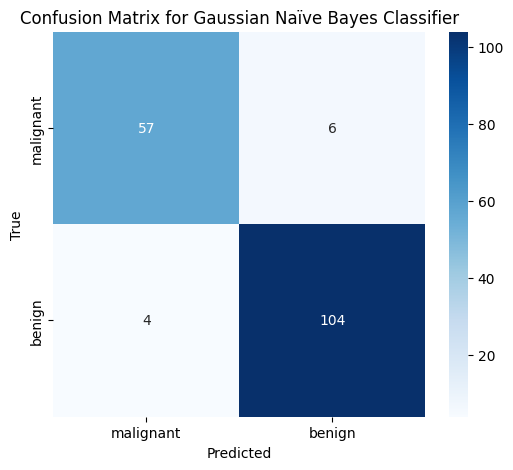

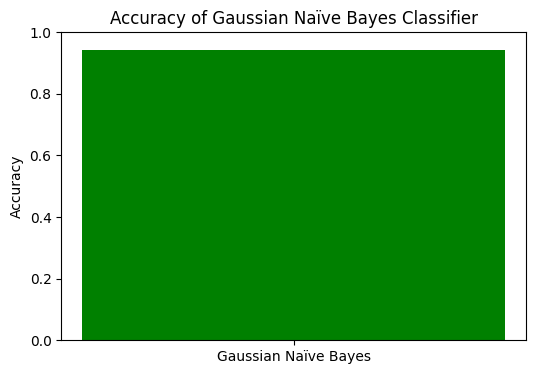

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Gaussian Naïve Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Gaussian Naïve Bayes classifier: {accuracy * 100:.2f}%")

# Plotting the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix for Gaussian Naïve Bayes Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotting the Accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Gaussian Naïve Bayes'], [accuracy], color='green')
plt.ylabel('Accuracy')
plt.title('Accuracy of Gaussian Naïve Bayes Classifier')
plt.ylim(0, 1)
plt.show()
